###### Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Daniel Koehn based on Jupyter notebooks by Marc Spiegelman [Dynamical Systems APMA 4101](https://github.com/mspieg/dynamical-systems) and  Kyle Mandli from his course [Introduction to numerical methods](https://github.com/mandli/intro-numerical-methods), notebook style sheet by L.A. Barba, N.C. Clementi [Engineering Computations](https://github.com/engineersCode)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Exploring the Lorenz Equations - the Movie 

While the Lorenz Equations describe a complex dynamic system, the presentation of the FD solution in the last notebook was quite static. The purpose of this notebook is to illustrate the dynamic of the problem, by a visualization of the 2D velocity and temperature fields in a movie.

Unfortunately, this notebook will NOT work in `JupyterLab`, so you have to run it in Jupyter on you laptop or desktop computer. 

## Numerical solution of the Lorenz Equations

As derived in the previous notebook, we have to solve the Lorenz equations using a FD approach. The final FD code was

\begin{equation}
\begin{split}
X^{n} &= X^{n-1} + dt\; \sigma(Y^{n-1} - X^{n-1})\\
Y^{n} &= Y^{n-1} + dt\; (rX^{n-1} - Y^{n-1} - X^{n-1}Z^{n-1})\\
Z^{n} &= Z^{n-1} + dt\; (X^{n-1}Y^{n-1} - b Z^{n-1})\\
\end{split}
\tag{1}
\end{equation}

with the temporal dicretization $t^n = n * dt$ with $n \in [0,1,...,nt]$, where $nt$ denotes the maximum time steps.

We can recycle most of the codes from the previous notebook. First, we define the RHS of the Lorenz eqs. (1) for a given position $(X,Y,Z)^T$ in the phase space by the function `Lorenz` ...

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Lorenz(X,Y,Z,sigma,r,b):
    
  '''
  Returns the RHS of the Lorenz equations
  '''

  # compute state derivatives
  X_dot_rhs = sigma * (Y - X)
  Y_dot_rhs = (r-Z) * X - Y
  Z_dot_rhs = X*Y - b*Z

  # return the state derivatives
  return X_dot_rhs, Y_dot_rhs, Z_dot_rhs

Next, we write the function to solve the Lorenz equation `SolveLorenz` and include a visualization of the temperature and vector field during the FD time stepping FOR-loop:

In [4]:
def SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma=10.,r=28.,b=8./3.0):
    
    '''
    Integrate the Lorenz equations from initial condition (X0,Y0,Z0)^T at t=0 
    for parameters sigma, r, b
    
    Returns: X, Y, Z, time
    '''
    
    # Compute number of time steps based on tmax and dt
    nt = (int)(tmax/dt)
    
    # vectors for storage of X, Y, Z positions and time t
    X  = np.zeros(nt + 1)
    Y  = np.zeros(nt + 1)
    Z  = np.zeros(nt + 1)
    t  = np.zeros(nt + 1)
    
    # define initial condition
    X[0] = X0
    Y[0] = Y0
    Z[0] = Z0
    
    # define 2D coordinates
    a = np.sqrt(0.5)
    x = np.linspace(0,1./a)
    z = np.linspace(0.,1.)
    X_coor,Z_coor = np.meshgrid(x,z)

    # compute initial velocity field
    U = - X[0] * np.pi * np.sin(a*np.pi*X_coor) * np.cos(np.pi*Z_coor)
    V = X[0] * a * np.pi * np.cos(a*np.pi*X_coor) * np.sin(np.pi*Z_coor)    
    
    # compute initial temperature field
    theta0 = np.cos(a*np.pi*X_coor)*np.sin(np.pi*Z_coor)
    theta1 = -np.sin(2.*np.pi*Z_coor)
    T = Y[0] * theta0 + Z[0] * theta1 + (1-Z_coor)
    
    # Initalize animation of temperature field 
    # -----------------------------------------    
    fig = plt.figure(figsize=(7,5))  # define figure size
    plt.tight_layout()
    extent = [np.min(x),np.max(x),np.min(z),np.max(z)] # define model extension
    
    # Plot temperature field movie
    image = plt.imshow(np.flipud(T), animated=True, cmap="magma", extent=extent, 
                          interpolation='nearest')
    
    Q = plt.quiver(X_coor,Z_coor,U,V)
    plt.title('Temperature field T')
    plt.xlabel('x [m]')
    plt.ylabel('z [m]')
    
    # activate interactive plot
    plt.ion()    
    plt.show(block=False)    
    
    # start time stepping over time samples n
    for n in range(1,nt + 1):
    
        # compute RHS of Lorenz eqs. (1) at current position (X,Y,Z)^T
        X_dot_rhs, Y_dot_rhs, Z_dot_rhs = Lorenz(X[n-1],Y[n-1],Z[n-1],sigma,r,b)
    
        # compute new position using FD approximation of time derivative
        # ADD FD SCHEME OF THE LORENZ EQS. HERE!
        X[n] = X[n-1] + X_dot_rhs * dt
        Y[n] = Y[n-1] + Y_dot_rhs * dt
        Z[n] = Z[n-1] + Z_dot_rhs * dt
        t[n] = n * dt
        
        # compute new temperature field
        T = Y[n] * theta0 + Z[n] * theta1 + (1-Z_coor)
        
        # compute new velocity field
        U = - X[n] * np.pi * np.sin(a*np.pi*X_coor) * np.cos(np.pi*Z_coor)
        V = X[n] * a * np.pi * np.cos(a*np.pi*X_coor) * np.sin(np.pi*Z_coor)
        
        # update temperature/velocity fields and time
        if (n % nsnap) == 0:
            image.set_data(np.flipud(T))
            Q.set_UVC(U,V)
            title = 'Temperature and velocity field, t = ' + "{:1.2f}".format(t[n])
            plt.title(title)
            fig.canvas.draw()

After these small modification, we can solve the Lorenz equations again ...

## Subcritical behavior $r<1$

As in the previous notebook, we will begin exploring the behavior of the Lorenz equations for fixed values of $\sigma$ and $b$ and just changing the Rayleigh number $r$.

We will begin with subcritical behavior $r=0.5$ which rapidly damps to a condition of no motion

<IPython.core.display.Javascript object>


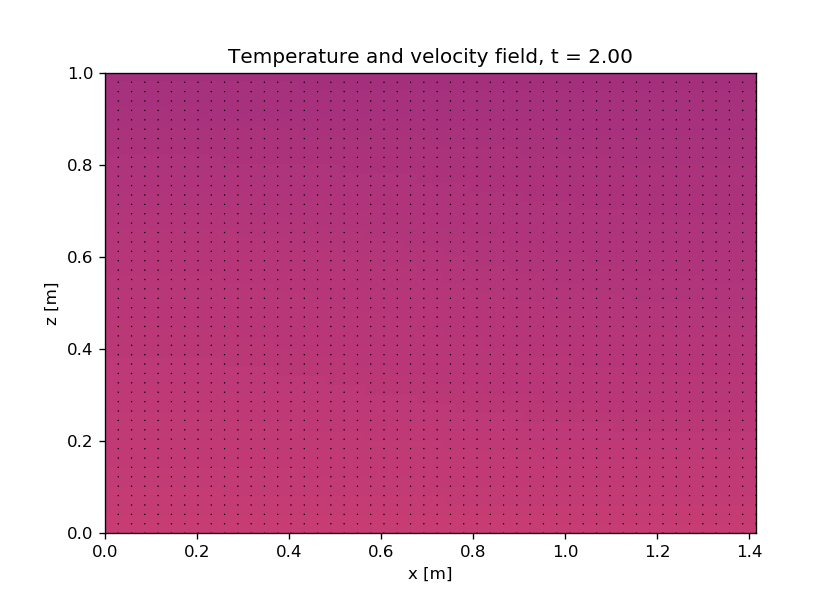

In [5]:
%matplotlib notebook

# Set the parameters
sigma= 10.
b = 8./3

# Set the initial condition
X0 = 2.
Y0 = 3.
Z0 = 4.

# Set maximum integration time and sample interval dt
tmax = 2
dt = 0.005

# Set the Rayleigh number
r = 0.5

# Plot snapshot every nsnap timesteps
nsnap = 2

# Solve the Lorenz equations
SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma, r, b)

## Damped Oscillation $r=10$

Now we increase the Rayleigh number to  $r=10$ which admits two steady solutions depending on initial condition.


<IPython.core.display.Javascript object>


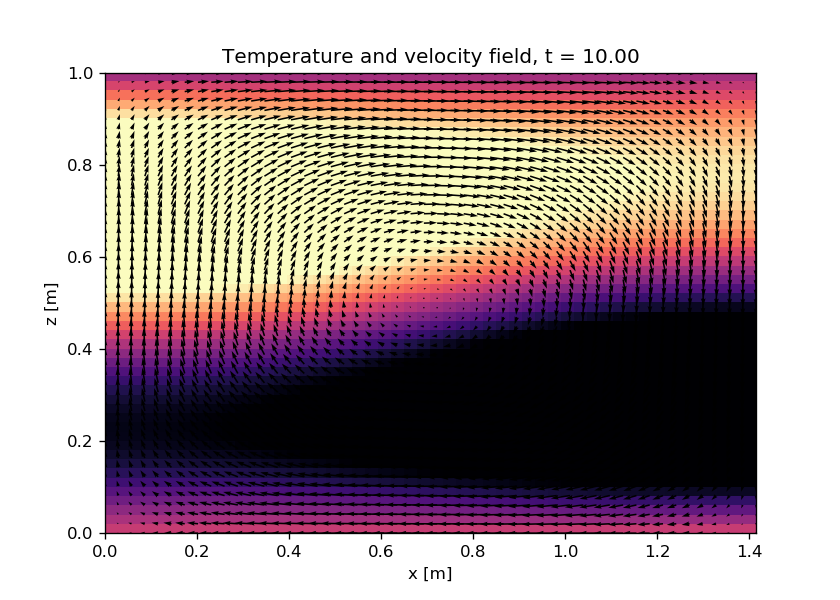

In [6]:
%matplotlib notebook

# Set the parameters
sigma= 10.
b = 8./3

# Set the initial condition
X0 = 2.
Y0 = 3.
Z0 = 4.

# Set maximum integration time and sample interval dt
tmax = 10
dt = 0.01

# Set the Rayleigh number
r = 10.

# Plot snapshot every nsnap timesteps
nsnap = 4

# Solve the Lorenz equations
SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma, r, b)

<IPython.core.display.Javascript object>


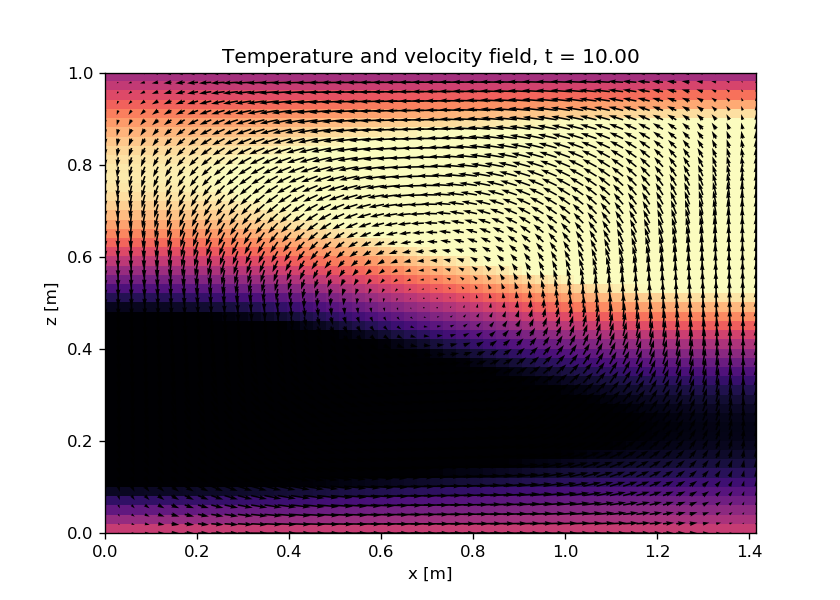

In [7]:
%matplotlib notebook

# Set the parameters
sigma= 10.
b = 8./3

# Set the initial condition
X0 = -2.
Y0 = -3.
Z0 = 4.

# Set maximum integration time and sample interval dt
tmax = 10
dt = 0.01

# Set the Rayleigh number
r = 10.

# Plot snapshot every nsnap timesteps
nsnap = 4

# Solve the Lorenz equations
SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma, r, b)

## Chaos and the strange attractor $r=28$

Now we increase the Rayleigh number to  $r=28$ and the solution becomes highly time-dependent and a-periodic.  


<IPython.core.display.Javascript object>


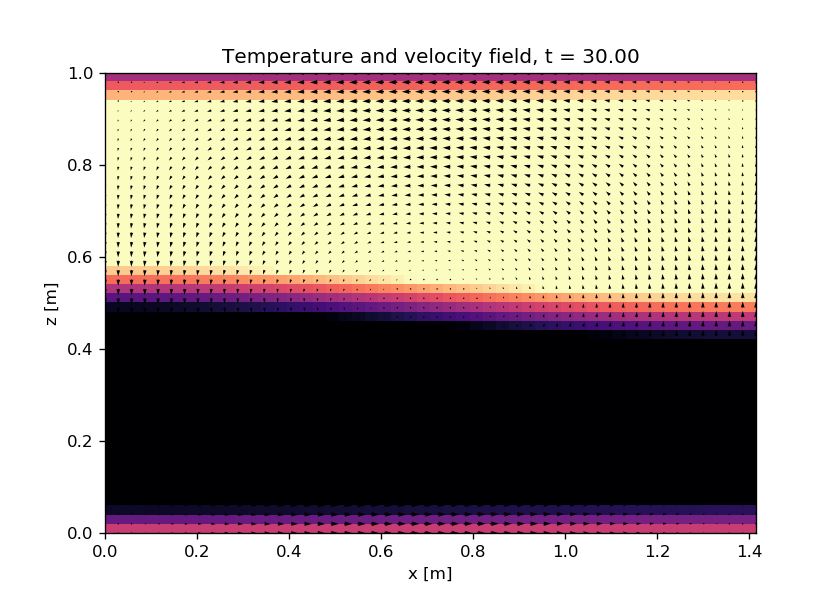

In [8]:
%matplotlib notebook

# Set the parameters
sigma= 10.
b = 8./3

# Set the initial condition
X0 = 2.
Y0 = 3.
Z0 = 4.

# Set maximum integration time and sample interval dt
tmax = 30
dt = 5e-4

# Set the Rayleigh number
r = 28.

# Plot snapshot every nsnap timesteps
nsnap = 120

# Solve the Lorenz equations
SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma, r, b)

## Limit Cycle at large Rayleigh number

Now we increase the Rayleigh number to  $r=350$ and the solution goes to a periodic limit cycle  


<IPython.core.display.Javascript object>


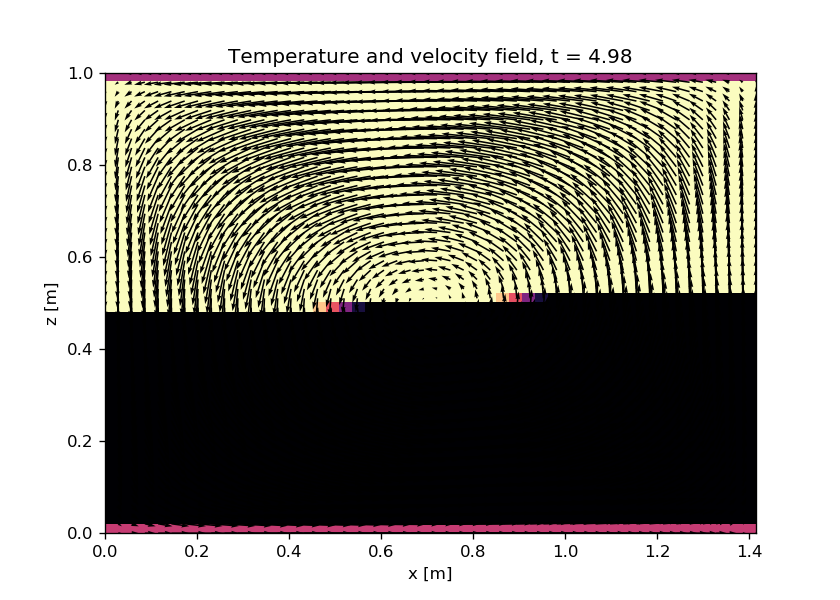

In [9]:
%matplotlib notebook

# Set the parameters
sigma= 10.
b = 8./3

# Set the initial condition
X0 = 2.
Y0 = 3.
Z0 = 4.

# Set maximum integration time and sample interval dt
tmax = 5
dt = 5e-4

# Set the Rayleigh number
r = 350.

# Plot snapshot every nsnap timesteps
nsnap = 60

# Solve the Lorenz equations
SolveLorenz(tmax, dt, X0, Y0, Z0, nsnap, sigma, r, b)

## What we learned:

- How to visualize the temperature and velocity flow fields of the FD solutions of the Lorenz equations as movies.